<a href="https://colab.research.google.com/github/9659tig/2022S-ML/blob/main/HW3_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **HW3 :: Parameter Tuning and Classifcation**

## 코랩과 구글 드라이브 연동 OR 로컬에서 파일 업로드
- 해당 섹션 코드 수정 가능

In [ ]:
# 연동 OR 파일 업로드
# 연동 시 path 설정 주의

In [36]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 데이터 불러오기

In [37]:
import numpy as np
import pandas as pd

In [38]:
path = 'heart_clean.csv' # 제공된 csv 파일 사용
df = pd.read_csv(path)

In [39]:
df.head()

,Age,RestingBP,FastingBS,ExerciseAngina,Oldpeak,HeartDisease
0,53,120,0,0,0.0,0
1,65,134,0,1,1.1,1
2,60,160,0,1,0.5,1
3,57,150,1,0,0.2,0
4,57,150,0,1,0.6,1


## 데이터 나누기

### **주의 사항**
train_test_split에 random seed를 사용하여 split set을 고정한다.
- 모든 문제에 같은 random seed를 부여할 필요는 없다.


In [40]:
from sklearn.model_selection import train_test_split

X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=1/9)

print("X_train's shape : ", X_train.shape)
print("y_train's shape : ", y_train.shape)
print("\nX_val's shape : ", X_val.shape)
print("y_val's shape : ", y_val.shape)
print("\nX_test's shape : ", X_test.shape)
print("y_test's shape : ", y_test.shape)


X_train's shape :  (568, 5)
y_train's shape :  (568,)

X_val's shape :  (71, 5)
y_val's shape :  (71,)

X_test's shape :  (71, 5)
y_test's shape :  (71,)




---



## 문제1 KNN



- Scikit-learn 라이브러리를 이용하여 KNN의 최적의 파라미터를 찾는다.
    - 최근접 이웃을 찾기 위한 거리의 종류로 최소한 두 가지 이상의 거리 척도를 사용한다.
    - K값을 최소 3개 이상 비교한다.
    - 거리 척도, k값에 따라 train, validation 정확도를 한 그래프로 그린다.(x축 k값, y축 정확도)
    - 찾은 최적의 파라미터와 test set 이용하여 test_accuracy 계산하고 기입한다.
    - 최적의 파라미터를 찾은 것에 대한 설명을 '텍스트 셀'에 작성한다.



		k=1			k=3			k=5		k=10			k=15
euclid train [0.9823943661971831, 0.8080985915492958, 0.7658450704225352, 0.7147887323943662, 0.7077464788732394]
euclid validation [0.6056338028169014, 0.6619718309859155, 0.704225352112676, 0.6338028169014085, 0.6619718309859155]
manhat train [0.9823943661971831, 0.823943661971831, 0.7922535211267606, 0.7429577464788732, 0.7376760563380281]
manhat validation [0.6056338028169014, 0.676056338028169, 0.6338028169014085, 0.7323943661971831, 0.7183098591549296]


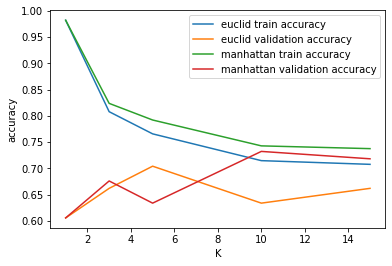

test accurancy : 0.74


In [41]:
### 문제 1 ###
## 코드 작성 ##
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=1/9)

K = [1, 3, 5, 10, 15]            

euclid_train_acc = []
manhat_train_acc = []
euclid_val_acc = []
manhat_val_acc = []

# 총 5개의 K 값 중 최적의 k 값을 찾을 것이다.
for k in K :
  #거리 척도는 euclidean distance, manhattan distance 2가지를 사용하여 비교하였다.
  knn_euclid = KNeighborsClassifier(k,metric="euclidean")
  knn_manhat = KNeighborsClassifier(k,metric="manhattan")

  knn_euclid.fit(X_train, y_train)
  knn_manhat.fit(X_train, y_train)

  #training set을 기반으로 score 측정
  score_train_euclid = knn_euclid.score(X_train, y_train)
  score_train_manhat = knn_manhat.score(X_train, y_train)
  #validation set을 기반으로 score 측정
  score_val_euclid = knn_euclid.score(X_val,y_val)
  score_val_manhat = knn_manhat.score(X_val,y_val)

  #scores1 = cross_val_score(knn_euclid,X_train,y_train,cv=9,scoring = "accuracy")    
  #scores2 = cross_val_score(knn_manhala,X_train,y_train,cv=9,scoring = "accuracy") 
  #print('<train> k: %d, accuracy: %.2f' % (k, score_train))
  #print('<validation> k: %d, accuracy: %.2f' % (k, score_val))

  #최종 평균값을 비교
  euclid_train_acc.append(score_train_euclid.mean())
  manhat_train_acc.append(score_train_manhat.mean())
  euclid_val_acc.append(score_val_euclid.mean())
  manhat_val_acc.append(score_val_manhat.mean())

print("\t\tk=1\t\t\tk=3\t\t\tk=5\t\tk=10\t\t\tk=15")
print("euclid train",euclid_train_acc)
print("euclid validation",euclid_val_acc)
print("manhat train",manhat_train_acc)
print("manhat validation",manhat_val_acc)

# x축을 K값, y축을 정확도로하여 K에 대한 train, validation의 정확도에 대한 그래프 생성
plt.plot(K, euclid_train_acc, label='euclid train accuracy')
plt.plot(K, euclid_val_acc, label='euclid validation accuracy')
plt.plot(K, manhat_train_acc, label='manhattan train accuracy')
plt.plot(K, manhat_val_acc, label='manhattan validation accuracy')
plt.xlabel('K')
plt.ylabel('accuracy')
plt.legend()
plt.show()

#기존의 training set, validation set을 합쳐 9개의 fold를 모두 training set으로
#활용하여 test set을 평가하였다.
X_all = [X_train,X_val]
y_all = [y_train,y_val]
X_new_train = pd.concat(X_all, ignore_index=True)
y_new_train = pd.concat(y_all, ignore_index=True)

#최적의 파라미터로 k=10, 거리 척도는 manhattan distance를 사용하여 test set의 정확도를 측정하였다.
knn = KNeighborsClassifier(10,metric="manhattan")
knn.fit(X_new_train,y_new_train)
score = knn.score(X_new_train,y_new_train)
print('test accurancy : %.2f' % score.mean())


**설명 작성**  
- 최적의 파라미터: manhattan distance, k=10
- 설명:\
먼저 euclidean distance를 살펴보면 k=5일 때 validation 정확도가 0.70으로 가장 높았으며 이 때 train 정확도는 0.76을 기록했다. mahattan distance로 거리를 측정했을 때 k=10일 때 validation 정확도가 0.73으로 가장 높았으며 train정확도는 0.74를 기록했다. validaiton set을 따로 분리하여 train set을 평가하는 이유가 training set에서는 높은 정확도를 보이더라도 overfitting이 발생할 수 있기 때문인데 이를 기반으로 test set을 평가한다고 했을 때 training set과 validation set의 정확도를 모두 높은 것이 좋겠지만 보통 validation score를 고려하여 파라미터를 고른다. 따라서 manhattan distance 기반의 k=10일 때의 validation accurancy가 euclidean distance 기반 일 때 validation auccrancy가 더 높고 training accurancy와의 차이도 적기 때문에 새로운 test set을 평가했을 때에도 온전한 성능을 기반으로 보다 높은 정확도를 보일 것이라고 판단하였다.



---



## 문제2 SVM


- Scikit-learn 라이브러리를 이용하여 SVM의 최적의 파라미터를 찾는다.
    - Kernel trick 중 최소 두개를 비교한다.
    - 최적의 파라미터 C값을 찾는다.
    - 파라미터에 따라 train, validation 정확도를 한 그래프로 그린다.(x축 C값, y축 정확도)
    - 찾은 최적의 파라미터와 test set을 이용하여 test accuracy를 계산하고 기입한다.
    - 최적의 파라미터를 찾은 것에 대한 설명을 '텍스트 셀'에 작성한다.


			C=0.01		C=0.1			C=1		C=10			C=100		C=1000
Polynomial train [0.5598591549295775, 0.5598591549295775, 0.6549295774647887, 0.7165492957746479, 0.7887323943661971, 0.7940140845070423]
Polynomial validation [0.49295774647887325, 0.49295774647887325, 0.704225352112676, 0.7887323943661971, 0.8169014084507042, 0.8169014084507042]
RBF train [0.5598591549295775, 0.5598591549295775, 0.6373239436619719, 0.6602112676056338, 0.7764084507042254, 0.795774647887324]
RBF validation [0.49295774647887325, 0.49295774647887325, 0.6338028169014085, 0.6901408450704225, 0.8028169014084507, 0.8169014084507042]


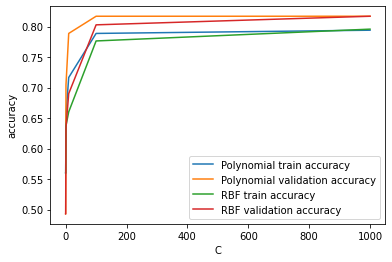

test accurancy : 0.80


In [42]:
### 문제 2 ###
## 코드 작성 ##
from sklearn.svm import SVC

C = [0.01, 0.1, 1, 10, 100, 1000]
poly_train_acc = []
rbf_train_acc = []
poly_val_acc = []
rbf_val_acc = []

for c in C:
  #Kerner trick으로 Polynomial kernel과 RBF를 비교하였다.
  svm_poly = SVC(kernel='poly',C=c)
  svm_rbf = SVC(kernel='rbf',C=c)
  
  svm_poly.fit(X_train,y_train)
  svm_rbf.fit(X_train,y_train)

  #training set을 기반으로 score 측정
  score_train_poly = svm_poly.score(X_train, y_train)
  score_train_rbf = svm_rbf.score(X_train, y_train)
  #validation set을 기반으로 score 측정
  score_val_poly = svm_poly.score(X_val,y_val)
  score_val_rbf = svm_rbf.score(X_val,y_val)

  #최종 평균값을 비교
  poly_train_acc.append(score_train_poly.mean())
  rbf_train_acc.append(score_train_rbf.mean())
  poly_val_acc.append(score_val_poly.mean())
  rbf_val_acc.append(score_val_rbf.mean())

print("\t\t\tC=0.01\t\tC=0.1\t\t\tC=1\t\tC=10\t\t\tC=100\t\tC=1000")
print("Polynomial train",poly_train_acc)
print("Polynomial validation",poly_val_acc)
print("RBF train",rbf_train_acc)
print("RBF validation",rbf_val_acc)

# x축을 C값, y축을 정확도로하여 C에 대한 train, validation의 정확도에 대한 그래프 생성
plt.plot(C, poly_train_acc, label='Polynomial train accuracy')
plt.plot(C, poly_val_acc, label='Polynomial validation accuracy')
plt.plot(C, rbf_train_acc, label='RBF train accuracy')
plt.plot(C, rbf_val_acc, label='RBF validation accuracy')
plt.xlabel('C')
plt.ylabel('accuracy')
plt.legend()
plt.show()

#기존의 training set, validation set을 합쳐 9개의 fold를 모두 training set으로
#활용하여 test set을 평가하였다. (X_new_train, y_new_train)
#최적의 파라미터로 C=1000, Kernel trick은 RBF를 사용하여 test set의 정확도를 측정하였다.
svm = SVC(kernel='rbf',C=1000)
svm.fit(X_new_train,y_new_train)
score = svm.score(X_new_train,y_new_train)
print('test accurancy : %.2f' % score.mean())



**설명 작성**  
- 최적의 파라미터: C=1000, Kernel trick: RBF
- 설명:\
Kernel Function으로 Polynomial kernel을 사용하였을 때는 C=100에서 0.82로 validation accurancy가 가장 높게 나왔고 C=1000에서도 동일한 값을 보였다. RBF를 사용하였을 때는 C=1000에서 가장 높은 validation accurancy를 보였고 Polynomial kernel을 사용하였을 때와 동일한 정확도로 측정되었다. 이는 그래프에서도 확인할 수 있는데 모두 C=1000 기점으로 확인하였을 때 정확도가 약 0.82에 수렴하는 경향을 보인다. 이를 바탕으로 hyper parameter C는 1000으로 설정하였으며 Kernel trick은 둘 다 사용 가능하나 기왕이면 training accurancy도 높았으면 좋겠어서 정말 사소하게나마 조금 더 높은 정확도를 보인 RBF로 설정하였다.



---



## 문제3 Cross validation with Random Forest
### 3-1: k-fold
- 수업시간에 배운 **5-fold** 를 이용하여 최적의 파라미터를 찾는다. (데이터는 동일)
- 수업시간에 배운 random forest 모델의 파라미터를 cross-validation을 바탕으로 최적화한다.
    - **5-fold CV를 할 때, test data를 제외한 90%의 데이터를 사용해야한다.**
    - 파라미터에 따라 K-fold CV를 통해 나온 평균 정확도와 각 fold의 정확도들을 한 그래프로 그린다.(x축 선택한 파라미터, y축 정확도)
    - 찾은 최적의 파라미터와 test set을 이용하여 test accuracy를 계산하고 기입한다.
    - 최적의 파라미터를 찾은 것에 대한 설명을 '텍스트 셀'에 작성한다.

### 3-2: Leave One Out
- 수업시간에 배운 Leave-One-Out 를 이용하여 최적의 파라미터를 찾는다. (데이터는 동일)
- 수업시간에 배운 random forest 모델의 파라미터를 cross-validation을 바탕으로 최적화한다.
  - **Leave-One-Out CV를 할 때, test data를 제외한 90%의 데이터를 사용해야한다.**
  - 파라미터에 따라 Leave-One-Out CV를 통해 나온 평균 정확도를 그래프로 그린다.(x축 선택한 파라미터, y축 정확도)
  - 찾은 최적의 파라미터와 test set을 이용하여 test accuracy를 계산하고 기입한다.
  - 최적의 파라미터를 찾은 것에 대한 설명을 '텍스트 셀'에 작성한다.

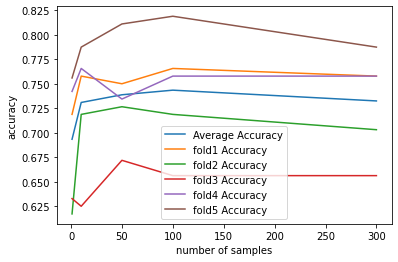

average accurancy :  [0.6933686023622048, 0.7309178149606299, 0.7387672244094488, 0.7434670275590551, 0.7324803149606299]
test accurancy : 0.76


In [46]:
### 문제 3-1 ###
## 코드 작성 ##
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

np.random.seed(10)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

#수업 시간에 배운 파라미터는 feature의 개수가 핵심이었지만 그래프의 x축으로
#설정하기 위해 sample 개수를 파라미터로 설정하였다.
#clf_all = RandomForestClassifier(max_features=None)
#clf_sqrt = RandomForestClassifier(max_features="sqrt")
#clf_log2 = RandomForestClassifier(max_features="log2")
sampling = [1,10,50,100,300]
scores=[]
fold1=[]
fold2=[]
fold3=[]
fold4=[]
fold5=[]

#score_all = cross_val_score(clf_all, X_train, y_train, scoring = 'accuracy', cv=5)
#score_sqrt = cross_val_score(clf_sqrt, X_train, y_train, scoring = 'accuracy', cv=5)
#score_log2 = cross_val_score(clf_log2, X_train, y_train, scoring = 'accuracy', cv=5)

#최적의 Random Forest Sample 개수(s)를 찾는다.
for s in sampling:
  clf = RandomForestClassifier(n_estimators=s)
  # 5개의 fold로 cross-validation을 수행한다.
  score = cross_val_score(clf, X_train, y_train, scoring = 'accuracy', cv=5)
  
  #s마다 같은 fold의 accurancy끼리 묶는다.
  fold1.append(score[0])
  fold2.append(score[1])
  fold3.append(score[2])
  fold4.append(score[3])
  fold5.append(score[4])
  
  scores.append(score.mean())

# x축을 sampling 개수, y축을 정확도로하여 sampling 개수에 대한 정확도 그래프 생성
plt.plot(sampling, scores, label='Average Accuracy')
plt.plot(sampling, fold1, label='fold1 Accuracy')
plt.plot(sampling, fold2, label='fold2 Accuracy')
plt.plot(sampling, fold3, label='fold3 Accuracy')
plt.plot(sampling, fold4, label='fold4 Accuracy')
plt.plot(sampling, fold5, label='fold5 Accuracy')
plt.xlabel('number of samples')
plt.ylabel('accuracy')
plt.legend()
plt.show()
print("average accurancy : ",scores)

#average accurancy가 가장 높은 s=100으로 잡고 test 
ranForest = RandomForestClassifier(n_estimators=100)
ranForest.fit(X_train,y_train)
score = ranForest.score(X_test,y_test)
print('test accurancy : %.2f' % score.mean())

**설명 작성**  
- test accuracy:0.76
- 최적의 파라미터:샘플개수(n_estimators)=100
- 설명:\
random forest sample개수를 1개, 10개, 50개,100개, 300개 까지 제한하며 cross-validation을 수행한 결과 100개를 가지고 sampling했을 때 정확도가 가장 높았다. 따라서 최적의 파리미터로 샘플개수를 100개로 설정하였다.



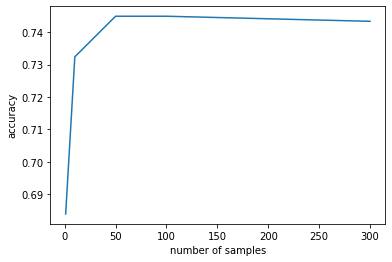

average accurancy :  [0.6838810641627543, 0.7323943661971831, 0.7449139280125195, 0.7449139280125195, 0.7433489827856025]
test accurancy : 0.76


In [48]:
### 문제 3-2 ###
## 코드 작성 ##
from sklearn.model_selection import LeaveOneOut

#sample 개수를 파라미터로 설정하였다.
sampling = [1,10,50,100,300]
scores=[]
#최적의 Random Forest Sample 개수(s)를 찾는다.
for s in sampling:
  clf = RandomForestClassifier(n_estimators=s)
  #fold 하나에 sample 하나
  loocv = LeaveOneOut()
  score = cross_val_score(clf,X_train,y_train,cv = loocv)
  scores.append(score.mean())

# x축을 sampling 개수, y축을 정확도로하여 sampling 개수에 대한 정확도 그래프 생성
plt.plot(sampling, scores, label='Average Accuracy')
plt.xlabel('number of samples')
plt.ylabel('accuracy')
plt.show()
print("average accurancy : ",scores)

#average accurancy가 가장 높은 s=100으로 잡고 test 
ranForest = RandomForestClassifier(n_estimators=100)
ranForest.fit(X_train,y_train)
score = ranForest.score(X_test,y_test)
print('test accurancy : %.2f' % score.mean())

**설명 작성**  
- test accuracy:0.76
- 최적의 파라미터: 샘플개수(n_estimators)=100
- 설명:\
random forest sample개수를 1개, 10개, 50개,100개, 300개 까지 제한하며 cross-validation을 수행한 결과 100개를 가지고 sampling했을 때 정확도가 가장 높았다. 따라서 최적의 파리미터로 샘플개수를 100개로 설정하였다.




---



## 문제4 Regression
문제 4 에서는 캘리포니아 주택 가격 데이터셋을 사용합니다.   
학습을 통해 주택 가격을 예측하는 문제입니다.  
데이터에 대한 자세한 설명은 아래 코드의 description을 참고해주세요.

In [49]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [50]:
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['target'] = housing.target

In [51]:
print(df.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  


In [52]:
print(df.shape) #(20640, 9)
print(df.describe())

(20640, 9)
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude        target  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308  

### 문제 4-1 : Pearson Correlation
- seaborn 패키지를 사용하여 pearson correlation heatmap을 그린다.
- heatmap을 확인한 후 각 feature들 간 어떠한 관계가 있는지 아래의 텍스트 셀에 서술한다.    
- target과 연관성이 높은 feature의 column들을 아래의 텍스트 셀에 기술한다.
- 기술한 columns들과 target column을 포함하여 DataFrame을 만들고 **이후 모든 문제에서는 이 DataFrame을 사용한다**.

<function matplotlib.pyplot.show>

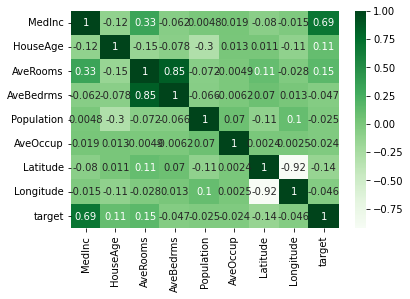

In [53]:
### 문제 4-1 ###
# correlation map 작성 후 plot
import matplotlib.pyplot as mp
import seaborn as sb

dataplot = sb.heatmap(df.corr(), cmap="Greens", annot=True)

mp.show


- **Feature들 간 관계 서술**  
  답: target과 MedInc 사이에는 비교적 강한 양의 상관 관계가 있다. AveRooms과 Medlnc는 3번 째로 강한 양의 상관 관계를 가진다. AveRooms와 AveBedrms는 feature들 간 관계 중 가장 강한 양의 상관 관계를 보인다. 반대로 Latitude와 Longitude는 가장 강한 음의 상관 관계를 보인다. 그 외 feature들의 관계는 모두 비교적 약한 상관 관계를 가지며 사실상 선형관계가 거의 없는 것으로 보여진다.

- **최종 선택한 feature들**  
  답: Medlnc

In [54]:
### 문제 4-1 ###
# 새 dataframe 만들기 

new_df = df[['MedInc', 'target']]
print(new_df.head())
print(new_df.shape)


   MedInc  target
0  8.3252   4.526
1  8.3014   3.585
2  7.2574   3.521
3  5.6431   3.413
4  3.8462   3.422
(20640, 2)


### 문제 4-2: MSE, r2 score
- Scikit-learn 라이브러리의 LinearRegression 모델을 사용한다.
- train data는 test data를 제외한 **90%의 데이터를 사용**해야한다.
- **Mean Square Error(MSE)**와 **r2 score**를 사용하여 train set에 대한 prediction 결과와 test set에 대한 prediction 결과를 구해 print 한다.
- Prediction 결과를 바탕으로 학습한 LinearRegression 모델의 overfit, underfit 여부와 판단 근거를 텍스트 셀에 서술한다.

In [64]:
### 문제 4-2 ###
## 코드 작성 ##
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

x = new_df.drop('target', axis=1)
y = new_df['target']

np.random.seed(30)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

estimator = LinearRegression()
estimator.fit(x_train, y_train)

print("<Train>")
y_pred = estimator.predict(x_train) 
MSE = metrics.mean_squared_error(y_train, y_pred)
r2 = metrics.r2_score(y_train, y_pred)
print("MSE : %.3F\tR2 : %.3f"%(MSE,r2))

print("<Test>")
y_pred = estimator.predict(x_test) 
MSE = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
print("MSE : %.3F\tR2 : %.3f"%(MSE,r2))



<Train>
MSE : 0.693	R2 : 0.477
<Test>
MSE : 0.775	R2 : 0.444


**Prediction 결과를 바탕으로 학습한 LinearRegression 모델의 overfit, underfit 여부와 판단 근거를 서술**   
답: 동일한 데이터지만 MSE를 사용했을 때와 R2를 사용하였을 때 모델의 score차이가 있다. 특히 training 단계에서 서로 큰 차이를 보이고 있다. Mean Square Error의 경우 train set에 대한 prediction 결과의 score가 test set보다 낮은 것을 확인할 수 있다. 이는 MSE를 사용한 모델의 설계 중 traiing 단계에서 지나친 단순화로 인해 발생한 에러로 낮은 score 값을 보인 underfitting이라고 판단된다.
반대로 R2를 사용하였을 때에는 굳이 정확도의 차이에 의의를 두자면 training data에서 너무 정확하게 model을 설계하려고 하여 발생한 overfitting으로 유추할 수 있다.

### 문제 4-3: Regularized Model
- Scikit-learn 라이브러리를 사용하여 Ridge Regression과 Lasso Regression 모델을 만든다.
- train : validation : test **데이터셋의 비율을 8:1:1**로 설정한다.
- 다양한 alpha 값에 대해 validation dataset을 사용하여 각 모델에 대한 **최적의 alpha 값을 찾고 찾은 최적의 alpha 값을 텍스트 셀에 작성**한다.
- alpha 값은 아래의 리스트를 사용한다.  
```alpha = [0.0001, 0.001,0.01,0.1,10]```
- alpha 값에 대한 R2 score의 변화를 그래프로 나타낸다.
  * **x축: alpha 값**
  * **y축: R2 score 값**
  * 파란색 선: Ridge 결과, 빨간색 선: Lasso 결과
  * 그래프에 **legend**가 포함되어 있어야 한다. 
- **train과 validation dataset을 합하여 train set을 만든 후 최종 학습 결과를 도출**한다.
  * 최적의 alpha 값을 찾을 때 사용한 test set은 변하지 않는다. 
  * r2 score를 사용하여 train set에 대한 prediction 결과와 test set에 대한 prediction 결과를 구해 print 한다.

In [70]:
### 문제 4-3 ###
## 코드 작성 ##
from sklearn.linear_model import Ridge, Lasso

# train : validation : test = 8 : 1 : 1
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=1/9)

alpha = [0.0001, 0.001,0.01,0.1,10]
lasso_score = []
ridge_score = []

#최적의 alpha값 찾기
for a in alpha:
  lasso = Lasso(alpha=a).fit(x_train,y_train)
  ridge = Ridge(alpha=a).fit(x_train,y_train)

  lasso_pred = lasso.predict(x_val) 
  ridge_pred = ridge.predict(x_val) 

  lasso_r2 = metrics.r2_score(y_val, lasso_pred)
  ridge_r2 = metrics.r2_score(y_val, ridge_pred)

  lasso_score.append(lasso_r2)
  ridge_score.append(ridge_r2)

print(lasso_score)
print(ridge_score)





[0.47549290527728927, 0.47551078442417904, 0.4756697539763143, 0.47527725782117514, -0.00016386223920594745]
[0.4754908965157263, 0.47549089702993164, 0.4754909021719682, 0.4754909535906383, 0.4754965908280212]


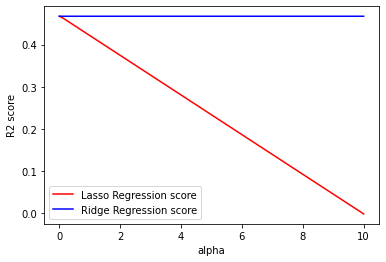

In [69]:
### 문제 4-3 ###
## 그래프 작성 ##
plt.plot(alpha, lasso_score, 'r', label='Lasso Regression score')
plt.plot(alpha, ridge_score, 'b', label='Ridge Regression score')
plt.xlabel('alpha')
plt.ylabel('R2 score')
plt.legend()
plt.show()


- Rridge regression 모델 최적의 alpha 값: 10
- Lasso regression 모델 최적의 alpha 값: 0.01

In [72]:
### 문제 4-3 ###
# 최종 결과 출력

#train set과 validation set합치기
x_all = [x_train,x_val]
y_all = [y_train,y_val]
x_new_train = pd.concat(x_all, ignore_index=True)
y_new_train = pd.concat(y_all, ignore_index=True)

#최적의 파라미터 Rridge regression , alpha = 10 / Lasso regression, alpha=0.01
lasso = Lasso(alpha=0.01).fit(x_new_train,y_new_train)
ridge = Ridge(alpha=10).fit(x_new_train,y_new_train)

#train set에 대한 prediction 결과
print("<Train>")
lasso_pred = lasso.predict(x_train) 
ridge_pred = ridge.predict(x_train) 
lasso_r2 = metrics.r2_score(y_train, lasso_pred)
ridge_r2 = metrics.r2_score(y_train, ridge_pred)
print("Rridge regression : %.3F\tLasso regression  : %.3f"%(ridge_r2,lasso_r2))

#test set에 대한 prediction 결과
print("<Test>")
lasso_pred = lasso.predict(x_test) 
ridge_pred = ridge.predict(x_test) 
lasso_r2 = metrics.r2_score(y_test, lasso_pred)
ridge_r2 = metrics.r2_score(y_test, ridge_pred)
print("Rridge regression : %.3F\tLasso regression  : %.3f"%(ridge_r2,lasso_r2))



<Train>
Rridge regression : 0.478	Lasso regression  : 0.478
<Test>
Rridge regression : 0.443	Lasso regression  : 0.443
